In [ ]:
#================================================================================
#
# Name: 01 Code Base.ipynb - Happy Days!
#
# Description: This notebook contains applies various machine learning algorithms:
#    - XGBoost
#    - Light GBM
#    - Random Forrest
#    - Catboost
#    - Logistic Regression
#    - Naive Bayes
#    - K-Nearest Neighbours
#    - Support Vector Machine
#    - Neural Network - Multilayer Perception
#    - SHAP Explanations
#
# Author: MT
# 
# Date: 2025-08-20
# 
# Steps:
# Step 0: Import Libraries
# Step 1: Read Data
# Step 2: Prepare Data
# Step 3: Models - XGBoost
# Step 4: Models - All Others
# Step 5: Randomised Grid Search
# Step 6: Results
# Step 7: Optuna
# 
#================================================================================

In [110]:
#================================================================================
# Step 0: Import Libraries

#--------------------
# Pandas and Numpy and copy
import pandas as pd
import numpy as np
import copy
pd.options.display.float_format = '{:.8f}'.format # supress scientific notation
pd.set_option('display.max_columns', 1000) # 1000 columns
#--------------------

#--------------------
# Plotly Express
import plotly.express as px
#--------------------

#--------------------
# Models
# XGBoost
from xgboost import XGBClassifier
import xgboost

# LightGBM
from lightgbm import LGBMClassifier

# Random Forrest
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Support Vector Machine
from sklearn.svm import SVC

# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

# Nerual Network
from sklearn.neural_network import MLPClassifier

# CATBoost
from catboost import CatBoostClassifier  

# Logistic REgression 
from sklearn.linear_model import LogisticRegression
#--------------------

#--------------------
# SHAP Explainability
import shap
shap.initjs()
#--------------------

#--------------------
# Model Performance
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
#--------------------

#--------------------
# Graphing
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#--------------------

#--------------------
# Hyperparameter Optimisation
import optuna
#--------------------
#================================================================================

In [111]:
#================================================================================
# Step 1: Read Data

# Preg - Number of times pregnant Numeric
# GlucPlasma - glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)
# BP - Diastolic Blood Pressure (mm Hg)
# Skin Triceps - skin fold thickness (mm)
# Insulin 2-Hour Serum insulin (lh/ml)
# BMI - Body mass index [weight in kg/(Height in m)]
# DPF - Diabetes pedigree function
# Age - Age (years)
# Outcome - Binary value indicating non-diabetic /diabetic Factor [0,1]

df = pd.read_csv('pima-indians-diabetes.data.txt')
df.info()
#================================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preg         768 non-null    int64  
 1   GlucPlasma   768 non-null    int64  
 2   BP           768 non-null    int64  
 3   SkinTriceps  768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DPF          768 non-null    float64
 7   Age          768 non-null    int64  
 8   Outcome      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
#================================================================================
# Step 2: Prepare Data

# Create X and y
X=df.loc[:,df.columns!='Outcome']
y=df.loc[:,df.columns=='Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
#================================================================================


In [113]:
#================================================================================
# Step 3: Models - XGBoost

#--------------------
# XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb=model_xgb.predict_proba(X_test)[:,1]
pred_xgb=pd.DataFrame({'pred_xgb': model_xgb.predict_proba(X_test)[:,1]})
#--------------------

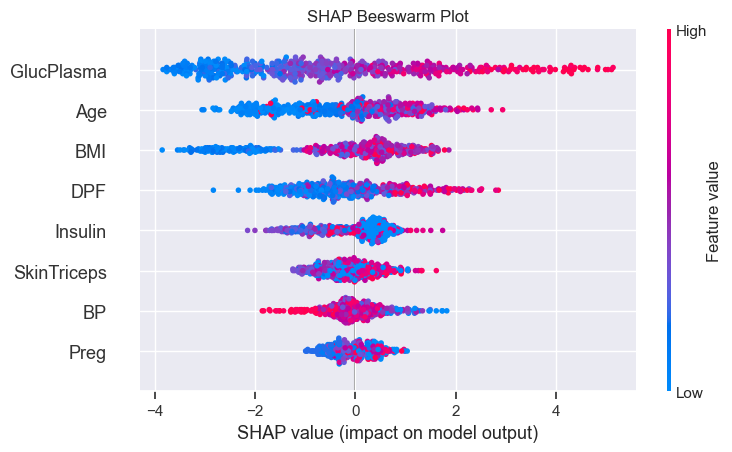

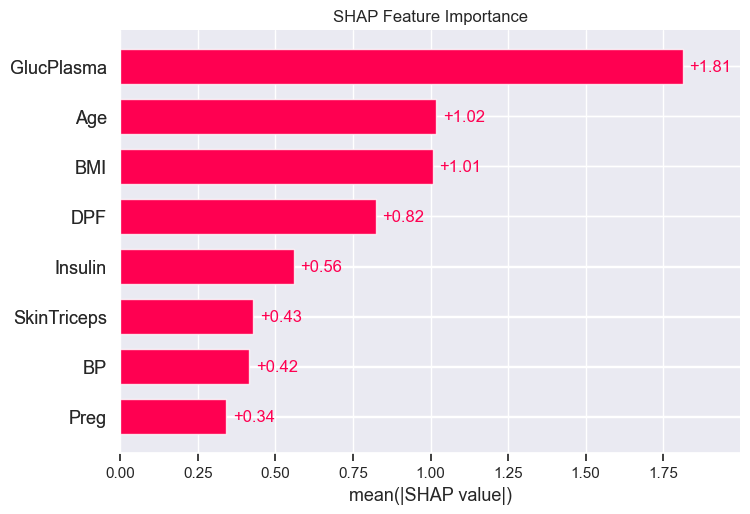

#### SHAP Scatter Plot

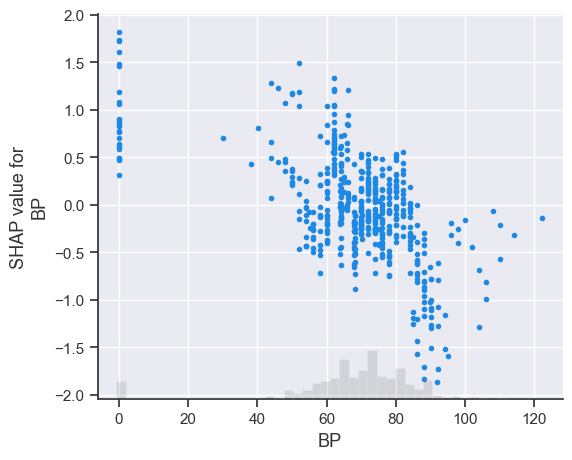

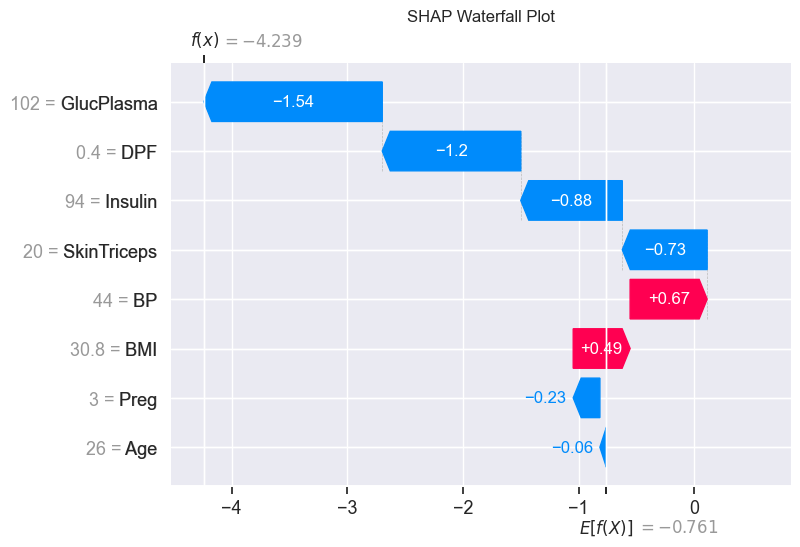

#### SHAP Force Plot

In [114]:
# SHAP Values
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer(X_train)

# Beeswarm
plt.title("SHAP Beeswarm Plot")
shap.plots.beeswarm(shap_values)

# Feature importance
plt.title("SHAP Feature Importance")
shap.plots.bar(shap_values)

# Scatter plot
display(Markdown("#### SHAP Scatter Plot"))
shap.plots.scatter(shap_values[:, "BP"])

# Waterfall
plt.title("SHAP Waterfall Plot")
shap.plots.waterfall(shap_values[0])

# Force plot
display(Markdown("#### SHAP Force Plot"))
shap.force_plot(shap_values[0])

In [115]:
# Feature importance - mean SHAP value
shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)
shap_df.abs().mean(axis=0).sort_values(ascending=False).round(3)
#================================================================================

GlucPlasma    1.81200004
Age           1.01900005
BMI           1.00699997
DPF           0.82300001
Insulin       0.55900002
SkinTriceps   0.42800000
BP            0.41600001
Preg          0.34099999
dtype: float32

In [116]:
#================================================================================
# Step 4: Models - All Others

#--------------------
# Light GBM
model_lgb = LGBMClassifier(verbose=-1)
model_lgb.fit(X_train, y_train.iloc[:,0])
pred_lgb=pd.DataFrame({'pred_lgb': model_lgb.predict_proba(X_test)[:,1]})
#--------------------

In [117]:
#--------------------
# Random Forrest
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train, y_train.iloc[:,0])
pred_rfc=pd.DataFrame({'pred_rfc': model_rfc.predict_proba(X_test)[:,1]})
#--------------------

In [118]:
#--------------------
# Catboost
model_cat=CatBoostClassifier(verbose=False)
model_cat.fit(X_train, y_train)
pred_cat=pd.DataFrame({'pred_cat': model_cat.predict_proba(X_test)[:,1]})
#--------------------

In [119]:
#--------------------
# Logistic Regression
model_lrg=LogisticRegression(penalty=None, solver='newton-cg')
model_lrg.fit(X_train, y_train.iloc[:,0])
pred_lrg=pd.DataFrame({'pred_lrg': model_lrg.predict_proba(X_test)[:,1]})
#--------------------

In [120]:
#--------------------
# Naive Bayes
model_nb=GaussianNB()
model_nb.fit(X_train,  y_train.iloc[:,0])
pred_nb=pd.DataFrame({'pred_nb': model_nb.predict_proba(X_test)[:,1]})
#--------------------

In [121]:
#--------------------
# K-Nearest Neighbours
model_knn=KNeighborsClassifier()
model_knn.fit(X_train, y_train.iloc[:,0])
pred_knn=pd.DataFrame({'pred_knn': model_knn.predict_proba(X_test)[:,1]})
#--------------------

In [122]:
#--------------------
# Support Vector Machine
model_svc=SVC(probability=True)
model_svc.fit(X_train, y_train.iloc[:,0])
pred_svc=pd.DataFrame({'pred_svc': model_svc.predict_proba(X_test)[:,1]})
#--------------------

In [123]:
#--------------------
# Neural Network - Multilayer Perception
model_mlp=MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000)
model_mlp.fit(X_train, y_train.iloc[:,0])
pred_mlp=pd.DataFrame({'pred_mlp': model_mlp.predict_proba(X_test)[:,1]})
#--------------------
#================================================================================

In [ ]:
#================================================================================
# Step 5: Randomised Grid Search

# https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
# https://datascience.stackexchange.com/questions/108233/recommendations-for-tuning-xgboost-hyperparams
# https://mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

# Parameters Space
params = {
    'max_depth': [2, 4, 6, 8, 10], 
    'n_estimators': np.arange(60, 401, 40, dtype=int),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'subsample': np.linspace(0.2, 1.0, 9),
    'colsample_bytree': np.linspace(0.2, 1.0, 9),
}

# Custom Scorer
def auc_from_proba(est, X, y):
    proba = est.predict_proba(X)
    p = proba[:, -1] if proba.ndim == 2 else proba
    return roc_auc_score(y, p)

# Define Randomised Grid Search
grid_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    n_iter=1000,
    param_distributions=params,
    scoring=auc_from_proba,
    n_jobs=-1,
    cv=3,
    verbose=3,
    return_train_score=True,
    random_state=1023
)

# Run Randomised Grid Search
grid_search.fit(X_train, y_train)

# Tabulated Results
gsresults=pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)
gsresults['OOF_Gini']=gsresults.mean_test_score*2-1
gsresults['IF_Gini']=gsresults.mean_train_score*2-1
#display(gsresults.head(3))

# Best Model
print('Best Model: ', grid_search.best_estimator_)

# Test Gini
Test_p=grid_search.predict_proba(X_test)[:,1]
Test_Gini=roc_auc_score(y_true=y_test, y_score=Test_p)*2-1
print('Best Test Gini: ', Test_Gini)

# Train Gini
Train_p=grid_search.predict_proba(X_train)[:,1]
Train_Gini=roc_auc_score(y_true=y_train, y_score=Train_p)*2-1
print('Best Train Gini: ', Train_Gini)

# In-Fold Gini
print('In-Fold Gini', gsresults[gsresults.rank_test_score==1]['IF_Gini'].values)

# Out-of-Fold Gini
print('Out-of-Fold Gini', gsresults[gsresults.rank_test_score==1]['OOF_Gini'].values)

# Best Gini
print('Best Gini: ', grid_search.best_score_*2-1)

# Best Parameters
print('Best Parameters: ', grid_search.best_params_)

# Best Model Index
print('Best Index: ', grid_search.best_index_)

#  Scorer
print('Criteria: ', grid_search.scorer_)

# Feature Names
print('Feature Names: ', grid_search.feature_names_in_)

# Store final predicted results
pred_xgb_RCV=pd.DataFrame({'pred_xgb_RCV': grid_search.predict_proba(X_test)[:,1]})
#================================================================================

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Best Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.30000000000000004, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=260, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best Test Gini:  0.665727321524423
Best Train Gini:  0.7726600322754167
In-Fold Gini [0.78968597]
Out-of-Fold Gini [0.67800454]
Best Gini: 

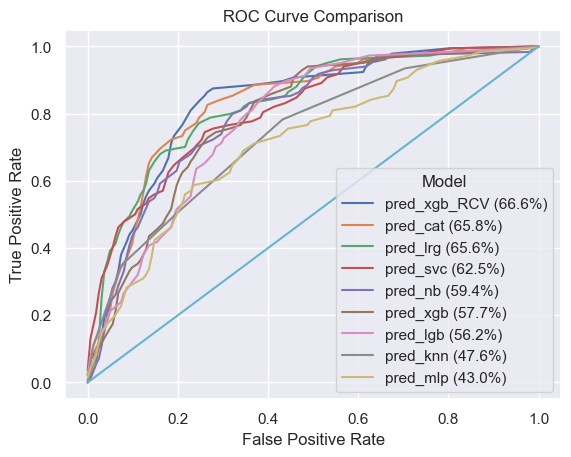

In [175]:
#================================================================================
# Step 6: Results

#--------------------
# Collate All Results
all_models=[]
results=pd.concat([y_test.reset_index(drop=True), 
                   pred_xgb, pred_lgb, pred_cat, pred_lrg, pred_nb, pred_knn, pred_svc, pred_mlp, pred_xgb_RCV], axis=1)
#--------------------

#--------------------
# Names and Number of Models
name_models=results.loc[:,results.columns!='Outcome'].columns
n_models=len(name_models)
#--------------------

#--------------------
# Loop Over All Models
for i in np.arange(n_models):

    # Initialise empty DataFrames
    if i==0:
        prep_auc=pd.DataFrame()
        prep_gini=pd.DataFrame()

    # Select the ith model
    this_model=name_models[i]

    # AUC
    fpr, tpr, _= roc_curve(y_true=results['Outcome'], y_score=results[this_model])
    t1= pd.DataFrame({'Model': this_model, 'fpr': fpr, 'tpr': tpr})
    prep_auc=pd.concat([prep_auc, t1], axis=0)

    # Gini
    Gini=roc_auc_score(y_true=results['Outcome'], y_score=results[this_model])*2-1
    t2=pd.DataFrame({'Model': this_model, 'Gini': Gini}, index=[0])
    prep_gini=pd.concat([prep_gini, t2], axis=0)

# Create ordered versions
prep_gini=prep_gini.sort_values('Gini', ascending=False).reset_index(drop=True).reset_index(names="Order").round(3)
prep_gini["GiniDisplay"] = (prep_gini["Gini"] * 100).round(1).astype(str) + "%"
prep_auc2=pd.merge(prep_auc, prep_gini, on="Model").sort_values('Order')
prep_auc2['Model']=prep_auc2['Model'] +  " (" + prep_auc2["GiniDisplay"] + ")"
#--------------------

#--------------------
# Print Results
sns.lineplot(data=prep_auc2, x='fpr', y='tpr', hue='Model', errorbar=None)
plt.plot([0, 1], [0, 1])
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#--------------------
#================================================================================

In [79]:
#================================================================================
# Step 7: Optuna

def objective(trial):

    param = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": 'gbtree',
        #"lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        #"alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int("max_depth", 1,20,1),
        'min_child_weight' : trial.suggest_float("min_child_weight", 1e-8, 1.0, log=True),
        'subsample' : trial.suggest_float("subsample", 1e-8, 1.0, log=True),
        'colsample_bytree' : trial.suggest_float("colsample_bytree", 1e-8, 1.0, log=True),
    }

    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dtest = xgboost.DMatrix(X_test, label=y_test)

    bst = xgboost.train(param, dtrain)
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)

    Gini = roc_auc_score(y_test, preds)*2-1
    return Gini

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)
print(study.best_trial)
#================================================================================

[I 2025-08-24 21:37:16,449] A new study created in memory with name: no-name-c3de0580-5b68-4a04-808d-6acc44bbdd3a
C:\Users\markt\AppData\Local\Temp\ipykernel_24252\496565296.py:13: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.

[I 2025-08-24 21:37:16,475] Trial 0 finished with value: 0.0 and parameters: {'eta': 7.142374332550865e-08, 'max_depth': 20, 'min_child_weight': 4.908172233338642e-07, 'subsample': 1.2994047562556476e-08, 'colsample_bytree': 0.005974401517825105}. Best is trial 0 with value: 0.0.
C:\Users\markt\AppData\Local\Temp\ipykernel_24252\496565296.py:13: FutureWarning:

suggest_int() got

FrozenTrial(number=0, state=1, values=[0.0], datetime_start=datetime.datetime(2025, 8, 24, 21, 37, 16, 451239), datetime_complete=datetime.datetime(2025, 8, 24, 21, 37, 16, 474997), params={'eta': 7.142374332550865e-08, 'max_depth': 20, 'min_child_weight': 4.908172233338642e-07, 'subsample': 1.2994047562556476e-08, 'colsample_bytree': 0.005974401517825105}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'eta': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'max_depth': IntDistribution(high=20, log=False, low=1, step=1), 'min_child_weight': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=True, low=1e-08, step=None)}, trial_id=0, value=None)
